In [21]:
import ROOT
%jsroot on
import matplotlib.pyplot as plt


In [22]:
Cuts = []
i = -0.9
while i < 1:
    Cuts.append(['pho1_MVA >'+str(i)+' && pho2_MVA >'+str(i),'pho1_MVA >'+str(i)+' && pho2_MVA >'+str(i)+' && pho3_MVA >'+str(i)+' && pho4_MVA >'+str(i), 'pho1_MVA > -0.9 && pho2_MVA > -0.9'+' && pho3_MVA >'+str(i)+' && pho4_MVA >'+str(i)])
    i +=0.01  


In [23]:
sigfiles = []
sigfiles.append(["/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/signal_m_60_skim.root",'60'])
sigfiles.append(["/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_55/signal_m_55_skim.root",'55'])
sigfiles.append(["/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_50/signal_m_50_skim.root",'50'])
sigfiles.append(["/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_45/signal_m_45_skim.root",'45'])
sigfiles.append(["/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_40/signal_m_40_skim.root",'40'])
sigfiles.append(["/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_35/signal_m_35_skim.root",'35'])
sigfiles.append(["/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_30/signal_m_30_skim.root",'30'])
sigfiles.append(["/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_25/signal_m_25_skim.root",'25'])
sigfiles.append(["/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_20/signal_m_20_skim.root",'20'])
sigfiles.append(["/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_15/signal_m_15_skim.root",'15'])

In [24]:
CommonCut = 'pho1_pt > 30 && pho2_pt > 18 && pho3_pt > 15 && pho4_pt > 15 && abs(pho1_eta) < 2.5 && abs(pho2_eta) < 2.5 && abs(pho3_eta) < 2.5 && abs(pho4_eta) < 2.5 && (abs(pho1_eta) < 1.4442 || abs(pho1_eta) > 1.566) && (abs(pho2_eta) < 1.4442 || abs(pho2_eta) > 1.566) && (abs(pho3_eta) < 1.4442 || abs(pho3_eta) > 1.566) && (abs(pho4_eta) < 1.4442 || abs(pho4_eta) > 1.566) && pho1_pixelseed==0 && pho2_pixelseed==0 && pho3_pixelseed==0 && pho4_pixelseed==0 && tp_mass > 110 && tp_mass < 180'

In [25]:
Eff_Cut1_DiPho = []
Eff_Cut2_DiPho = []
Eff_Cut3_DiPho = []
tch_DiPho = ROOT.TChain("DiPhotonTree")
tch_DiPho.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/DiPho40to80_skim.root/DiPhotonJetsBox_M40_80_Sherpa_13TeV_4photons");
tch_DiPho.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/DiPho80toInf_skim.root/DiPhotonJetsBox_MGG_80toInf_13TeV_Sherpa_13TeV_4photons");
for cut in Cuts:
    Evs_Tot_DiPho = tch_DiPho.Draw("pho1_pt",CommonCut)
    Evs_Cut1_DiPho = tch_DiPho.Draw("pho1_pt",CommonCut +'&&'+ cut[0])
    Evs_Cut2_DiPho = tch_DiPho.Draw("pho1_pt",CommonCut +'&&'+ cut[1])
    Evs_Cut3_DiPho = tch_DiPho.Draw("pho1_pt",CommonCut +'&&'+ cut[2])
    Eff_Cut1_DiPho.append(1-(float(Evs_Cut1_DiPho)/float(Evs_Tot_DiPho)))
    Eff_Cut2_DiPho.append(1-(float(Evs_Cut2_DiPho)/float(Evs_Tot_DiPho)))
    Eff_Cut3_DiPho.append(1-(float(Evs_Cut3_DiPho)/float(Evs_Tot_DiPho)))

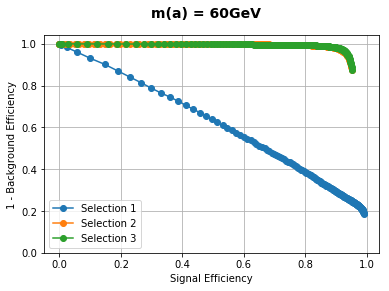

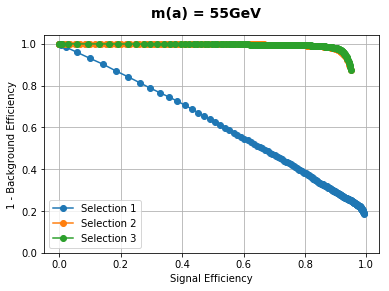

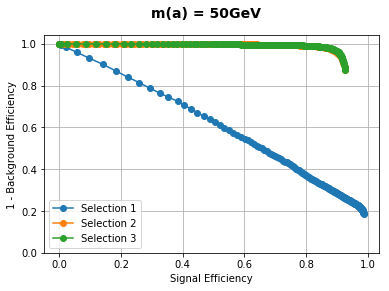

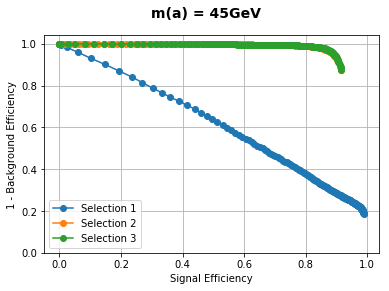

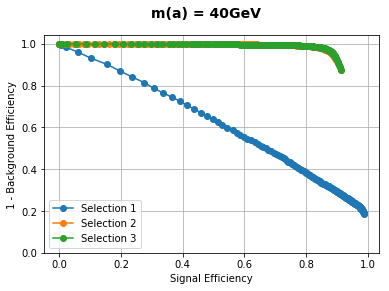

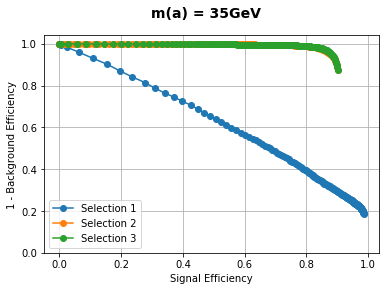

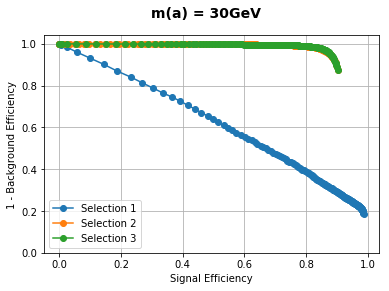

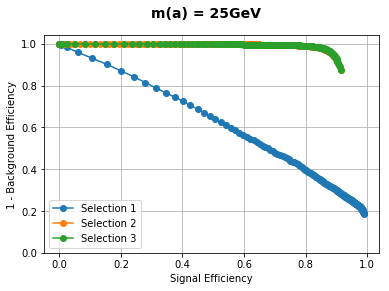

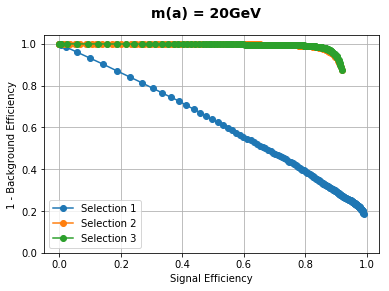

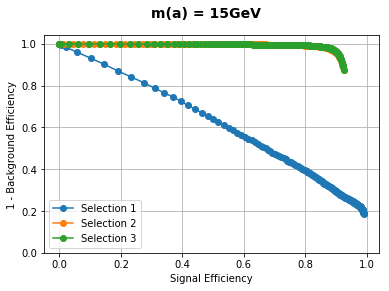

<Figure size 432x288 with 0 Axes>

In [26]:
for fi, f in enumerate(sigfiles):
    Eff_Cut1 = []
    Eff_Cut2 = []
    Eff_Cut3 = []
    for cut in Cuts:
        tch = ROOT.TChain('SUSYGluGluToHToAA_AToGG_M_'+f[1]+'_TuneCUETP8M1_13TeV_pythia8_13TeV_4photons')
        tch.Add(f[0])
        Evs_Tot = tch.Draw("pho1_pt",CommonCut)
        Evs_Cut1 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[0])
        Evs_Cut2 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[1])
        Evs_Cut3 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[2])
        Eff_Cut1.append(float(Evs_Cut1)/float(Evs_Tot))
        Eff_Cut2.append(float(Evs_Cut2)/float(Evs_Tot))
        Eff_Cut3.append(float(Evs_Cut3)/float(Evs_Tot))

    Selection1 = plt.plot(Eff_Cut1, Eff_Cut1_DiPho, marker='o', label='Selection 1')
    Selection2 = plt.plot(Eff_Cut2, Eff_Cut2_DiPho, marker='o', label='Selection 2')
    Selection3 = plt.plot(Eff_Cut3, Eff_Cut3_DiPho, marker='o', label='Selection 3')
    plt.xlabel('Signal Efficiency')
    plt.ylabel('1 - Background Efficiency')
    plt.suptitle('m(a) = '+f[1]+'GeV', fontsize=14, fontweight='bold')
    plt.grid(True)
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()
    plt.savefig('MVA_'+f[1]+'_vsDiPhoton.pdf')



In [31]:
Eff_Cut1_GJet = []
Eff_Cut2_GJet = []
Eff_Cut3_GJet = []
tch_GJet = ROOT.TChain("GJetTree")
tch_GJet.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/GJet20to40_skim.root/GJet_Pt_20to40_DoubleEMEnriched_MGG_80toInf_TuneCUETP8M1_13TeV_Pythia8_13TeV_4photons");
tch_GJet.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/GJet20toInf_skim.root/GJet_Pt_20toInf_DoubleEMEnriched_MGG_40to80_TuneCUETP8M1_13TeV_Pythia8_13TeV_4photons");
tch_GJet.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/GJet40toInf_skim.root/GJet_Pt_40toInf_DoubleEMEnriched_MGG_80toInf_TuneCUETP8M1_13TeV_Pythia8_13TeV_4photons");

for cut in Cuts:
    Evs_Tot_GJet = tch_GJet.Draw("pho1_pt",CommonCut)
    Evs_Cut1_GJet = tch_GJet.Draw("pho1_pt",CommonCut +'&&'+ cut[0])
    Evs_Cut2_GJet = tch_GJet.Draw("pho1_pt",CommonCut +'&&'+ cut[1])
    Evs_Cut3_GJet = tch_GJet.Draw("pho1_pt",CommonCut +'&&'+ cut[2])
    Eff_Cut1_GJet.append(1-(float(Evs_Cut1_GJet)/float(Evs_Tot_GJet)))
    Eff_Cut2_GJet.append(1-(float(Evs_Cut2_GJet)/float(Evs_Tot_GJet)))
    Eff_Cut3_GJet.append(1-(float(Evs_Cut3_GJet)/float(Evs_Tot_GJet)))

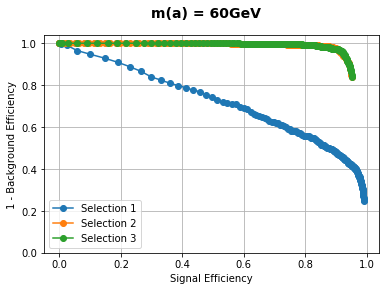

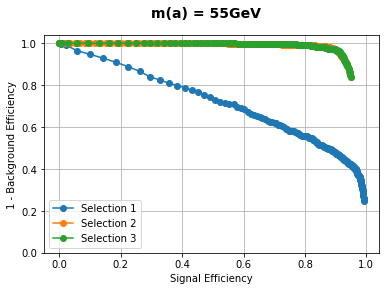

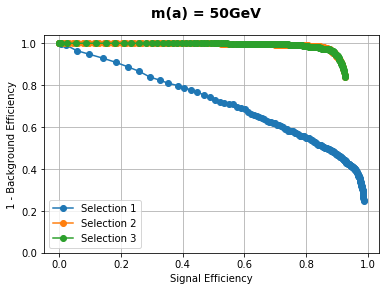

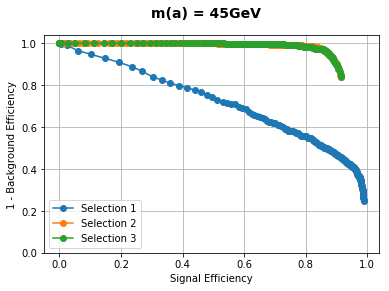

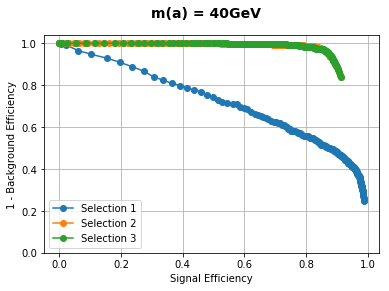

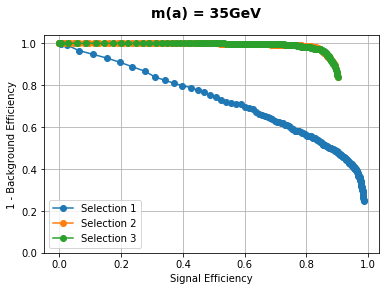

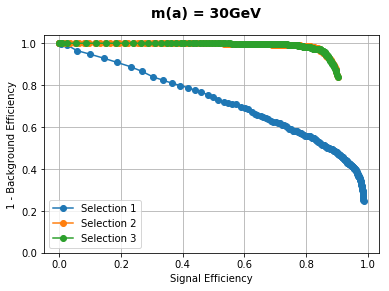

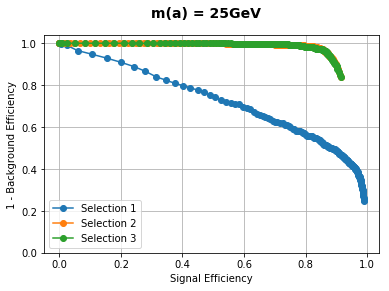

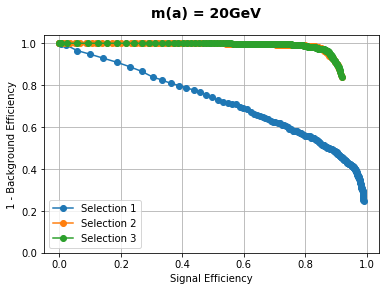

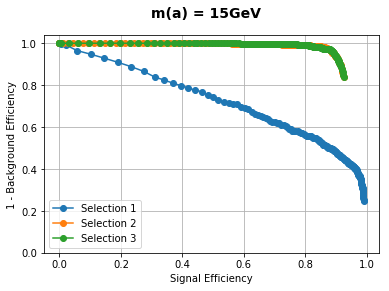

<Figure size 432x288 with 0 Axes>

In [32]:
for fi, f in enumerate(sigfiles):
    Eff_Cut1 = []
    Eff_Cut2 = []
    Eff_Cut3 = []
    for cut in Cuts:
        tch = ROOT.TChain('SUSYGluGluToHToAA_AToGG_M_'+f[1]+'_TuneCUETP8M1_13TeV_pythia8_13TeV_4photons')
        tch.Add(f[0])
        Evs_Tot = tch.Draw("pho1_pt",CommonCut)
        Evs_Cut1 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[0])
        Evs_Cut2 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[1])
        Evs_Cut3 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[2])
        Eff_Cut1.append(float(Evs_Cut1)/float(Evs_Tot))
        Eff_Cut2.append(float(Evs_Cut2)/float(Evs_Tot))
        Eff_Cut3.append(float(Evs_Cut3)/float(Evs_Tot))

    Selection1 = plt.plot(Eff_Cut1, Eff_Cut1_GJet, marker='o', label='Selection 1')
    Selection2 = plt.plot(Eff_Cut2, Eff_Cut2_GJet, marker='o', label='Selection 2')
    Selection3 = plt.plot(Eff_Cut3, Eff_Cut3_GJet, marker='o', label='Selection 3')
    plt.xlabel('Signal Efficiency')
    plt.ylabel('1 - Background Efficiency')
    plt.suptitle('m(a) = '+f[1]+'GeV', fontsize=14, fontweight='bold')
    plt.grid(True)
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()
    plt.savefig('MVA_'+f[1]+'_vsGJet.pdf')

In [33]:
Eff_Cut1_QCD = []
Eff_Cut2_QCD = []
Eff_Cut3_QCD = []
tch_QCD = ROOT.TChain("QCDTree")
tch_QCD.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/QCD30to40_skim.root/QCD_Pt_30to40_DoubleEMEnriched_MGG_80toInf_TuneCUETP8M1_13TeV_Pythia8_13TeV_4photons");
tch_QCD.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/QCD40toInf_skim.root/QCD_Pt_40toInf_DoubleEMEnriched_MGG_80toInf_TuneCUETP8M1_13TeV_Pythia8_13TeV_4photons");

for cut in Cuts:
    Evs_Tot_QCD = tch_QCD.Draw("pho1_pt",CommonCut)
    Evs_Cut1_QCD = tch_QCD.Draw("pho1_pt",CommonCut +'&&'+ cut[0])
    Evs_Cut2_QCD = tch_QCD.Draw("pho1_pt",CommonCut +'&&'+ cut[1])
    Evs_Cut3_QCD = tch_QCD.Draw("pho1_pt",CommonCut +'&&'+ cut[2])
    Eff_Cut1_QCD.append(1-(float(Evs_Cut1_QCD)/float(Evs_Tot_QCD)))
    Eff_Cut2_QCD.append(1-(float(Evs_Cut2_QCD)/float(Evs_Tot_QCD)))
    Eff_Cut3_QCD.append(1-(float(Evs_Cut3_QCD)/float(Evs_Tot_QCD)))

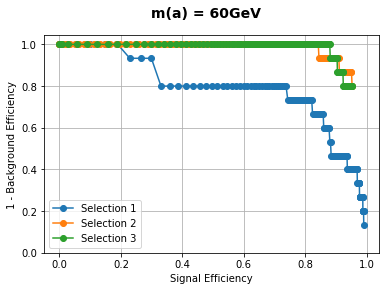

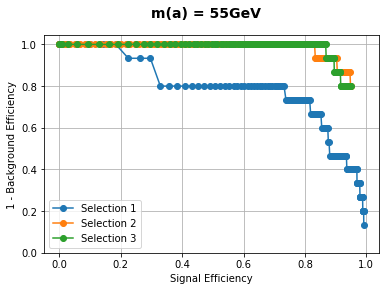

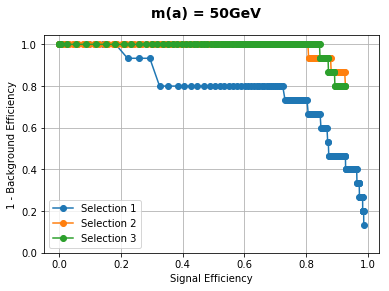

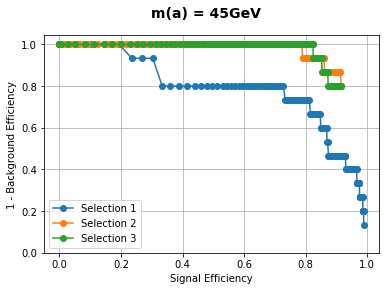

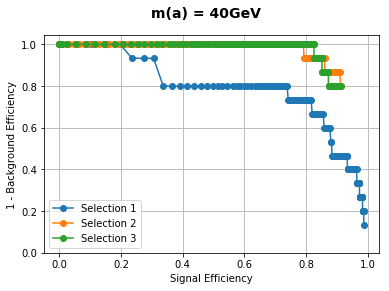

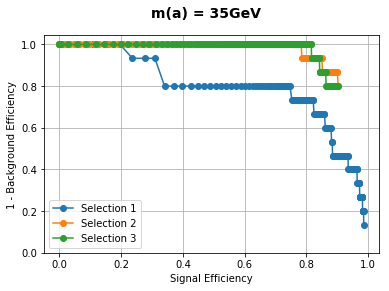

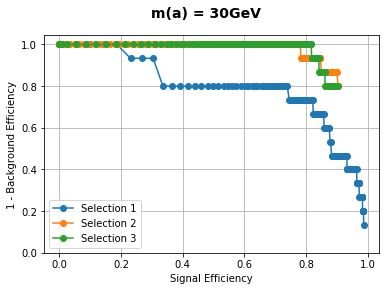

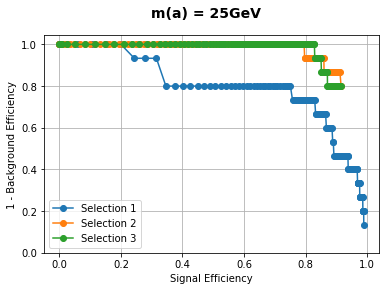

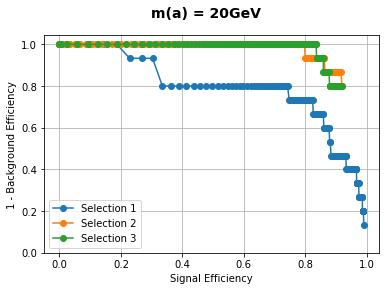

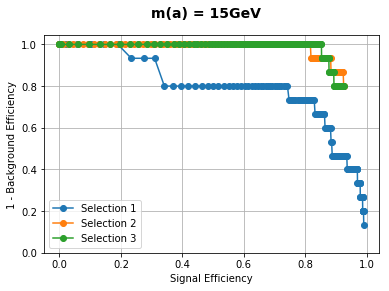

<Figure size 432x288 with 0 Axes>

In [34]:
for fi, f in enumerate(sigfiles):
    Eff_Cut1 = []
    Eff_Cut2 = []
    Eff_Cut3 = []
    for cut in Cuts:
        tch = ROOT.TChain('SUSYGluGluToHToAA_AToGG_M_'+f[1]+'_TuneCUETP8M1_13TeV_pythia8_13TeV_4photons')
        tch.Add(f[0])
        Evs_Tot = tch.Draw("pho1_pt",CommonCut)
        Evs_Cut1 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[0])
        Evs_Cut2 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[1])
        Evs_Cut3 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[2])
        Eff_Cut1.append(float(Evs_Cut1)/float(Evs_Tot))
        Eff_Cut2.append(float(Evs_Cut2)/float(Evs_Tot))
        Eff_Cut3.append(float(Evs_Cut3)/float(Evs_Tot))

    Selection1 = plt.plot(Eff_Cut1, Eff_Cut1_QCD, marker='o', label='Selection 1')
    Selection2 = plt.plot(Eff_Cut2, Eff_Cut2_QCD, marker='o', label='Selection 2')
    Selection3 = plt.plot(Eff_Cut3, Eff_Cut3_QCD, marker='o', label='Selection 3')
    plt.xlabel('Signal Efficiency')
    plt.ylabel('1 - Background Efficiency')
    plt.suptitle('m(a) = '+f[1]+'GeV', fontsize=14, fontweight='bold')
    plt.grid(True)
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()
    plt.savefig('MVA_'+f[1]+'_vsQCD.pdf')

In [35]:
Eff_Cut1_Bkg = []
Eff_Cut2_Bkg = []
Eff_Cut3_Bkg = []
tch_Bkg = ROOT.TChain("BkgTree")
tch_Bkg.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/QCD30to40_skim.root/QCD_Pt_30to40_DoubleEMEnriched_MGG_80toInf_TuneCUETP8M1_13TeV_Pythia8_13TeV_4photons");
tch_Bkg.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/QCD40toInf_skim.root/QCD_Pt_40toInf_DoubleEMEnriched_MGG_80toInf_TuneCUETP8M1_13TeV_Pythia8_13TeV_4photons");
tch_Bkg.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/GJet20to40_skim.root/GJet_Pt_20to40_DoubleEMEnriched_MGG_80toInf_TuneCUETP8M1_13TeV_Pythia8_13TeV_4photons");
tch_Bkg.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/GJet20toInf_skim.root/GJet_Pt_20toInf_DoubleEMEnriched_MGG_40to80_TuneCUETP8M1_13TeV_Pythia8_13TeV_4photons");
tch_Bkg.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/GJet40toInf_skim.root/GJet_Pt_40toInf_DoubleEMEnriched_MGG_80toInf_TuneCUETP8M1_13TeV_Pythia8_13TeV_4photons");
tch_Bkg.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/DiPho40to80_skim.root/DiPhotonJetsBox_M40_80_Sherpa_13TeV_4photons");
tch_Bkg.Add("/eos/user/t/twamorka/Jan2020/2016Samples/OldDiphoPairing/wCatMVA_20Jan2020/m_60/DiPho80toInf_skim.root/DiPhotonJetsBox_MGG_80toInf_13TeV_Sherpa_13TeV_4photons");


for cut in Cuts:
    Evs_Tot_Bkg = tch_Bkg.Draw("pho1_pt",CommonCut)
    Evs_Cut1_Bkg = tch_Bkg.Draw("pho1_pt",CommonCut +'&&'+ cut[0])
    Evs_Cut2_Bkg = tch_Bkg.Draw("pho1_pt",CommonCut +'&&'+ cut[1])
    Evs_Cut3_Bkg = tch_Bkg.Draw("pho1_pt",CommonCut +'&&'+ cut[2])
    Eff_Cut1_Bkg.append(1-(float(Evs_Cut1_Bkg)/float(Evs_Tot_Bkg)))
    Eff_Cut2_Bkg.append(1-(float(Evs_Cut2_Bkg)/float(Evs_Tot_Bkg)))
    Eff_Cut3_Bkg.append(1-(float(Evs_Cut3_Bkg)/float(Evs_Tot_Bkg)))

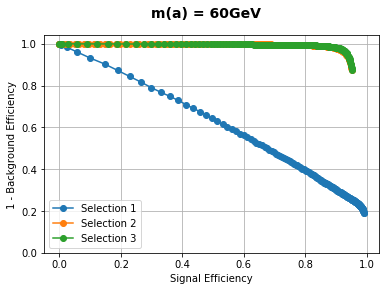

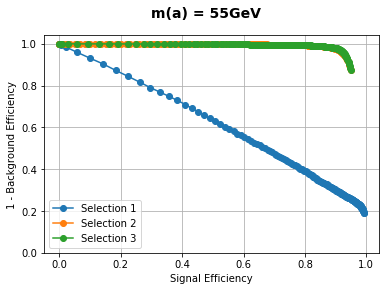

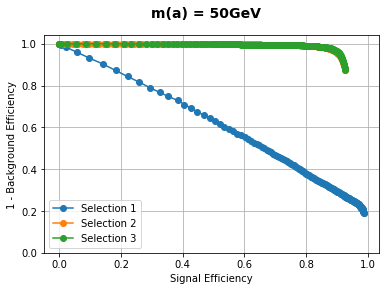

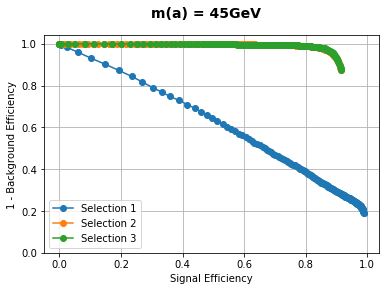

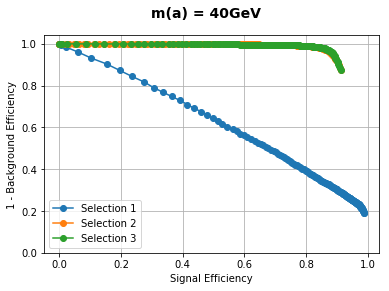

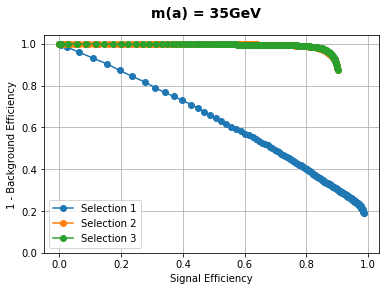

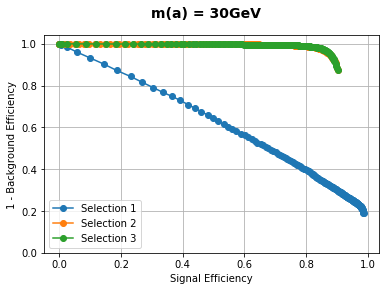

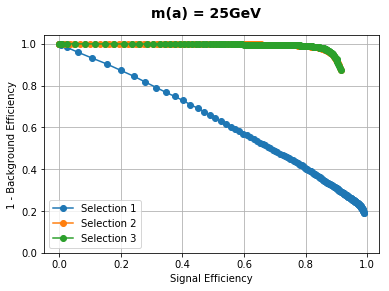

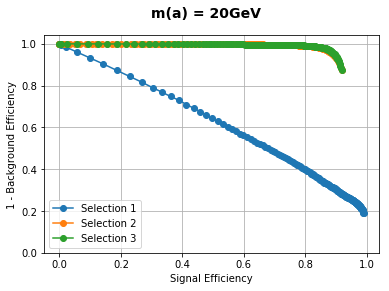

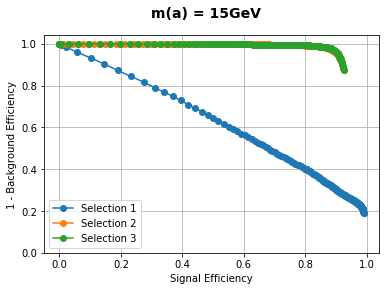

<Figure size 432x288 with 0 Axes>

In [36]:
for fi, f in enumerate(sigfiles):
    Eff_Cut1 = []
    Eff_Cut2 = []
    Eff_Cut3 = []
    for cut in Cuts:
        tch = ROOT.TChain('SUSYGluGluToHToAA_AToGG_M_'+f[1]+'_TuneCUETP8M1_13TeV_pythia8_13TeV_4photons')
        tch.Add(f[0])
        Evs_Tot = tch.Draw("pho1_pt",CommonCut)
        Evs_Cut1 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[0])
        Evs_Cut2 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[1])
        Evs_Cut3 = tch.Draw("pho1_pt",CommonCut+'&&'+cut[2])
        Eff_Cut1.append(float(Evs_Cut1)/float(Evs_Tot))
        Eff_Cut2.append(float(Evs_Cut2)/float(Evs_Tot))
        Eff_Cut3.append(float(Evs_Cut3)/float(Evs_Tot))

    Selection1 = plt.plot(Eff_Cut1, Eff_Cut1_Bkg, marker='o', label='Selection 1')
    Selection2 = plt.plot(Eff_Cut2, Eff_Cut2_Bkg, marker='o', label='Selection 2')
    Selection3 = plt.plot(Eff_Cut3, Eff_Cut3_Bkg, marker='o', label='Selection 3')
    plt.xlabel('Signal Efficiency')
    plt.ylabel('1 - Background Efficiency')
    plt.suptitle('m(a) = '+f[1]+'GeV', fontsize=14, fontweight='bold')
    plt.grid(True)
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()
    plt.savefig('MVA_'+f[1]+'_vsAllBkg.pdf')